# Assignment 3 (Data Science Tools and Techniques, AM609)
# Reg. No: 24-14-16
# Name: Chandan Maity
# Course: M.Tech Modelling & Simulation

#

## Q1. Write a function that takes input (x,y) and returns MLE theta using normal equation. Use numpy in python to implement. create a feature set x using linspace or np.random function and target values y. Call the function by passing these arguments and plot the precited values against input data.

## Q2.  Write a program to implement polynomial regression and compare it with the result obtained in the last question by plotting both the hypothesis..

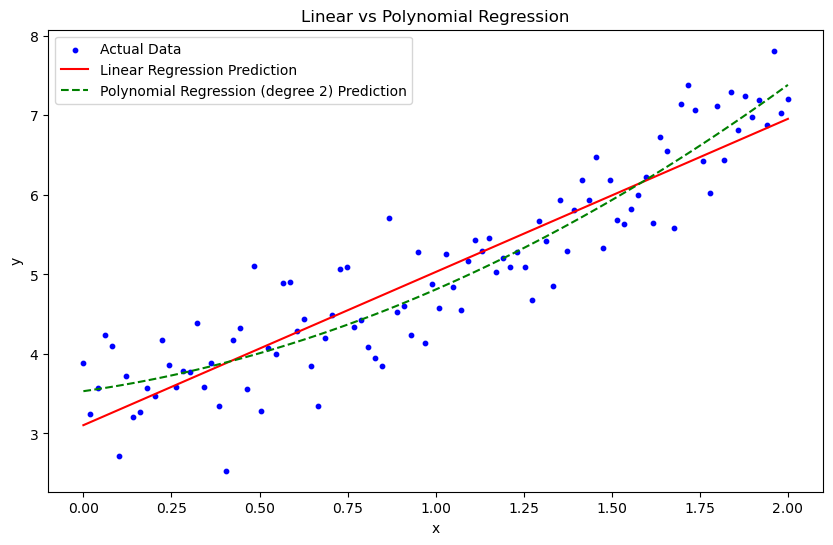

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def linear_mle_normal_eq(x, y):
    X_b = np.c_[np.ones((x.shape[0], 1)), x]  
    theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
    return theta_best

def polynomial_regression(x, y, degree):
    X_poly = np.c_[np.ones((x.shape[0], 1))]  
    for i in range(1, degree + 1):
        X_poly = np.c_[X_poly, x ** i]
        
    theta_poly = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y
    return theta_poly, X_poly


np.random.seed(0)
x = np.linspace(0, 2, 100).reshape(-1, 1)
y = 3 + 2 * x + np.random.normal(0, 0.5, (100, 1))

# Linear Regression prediction
theta_linear = linear_mle_normal_eq(x, y)
y_pred_linear = np.c_[np.ones((x.shape[0], 1)), x] @ theta_linear

# Polynomial Regression prediction 
degree = 2
theta_poly, X_poly = polynomial_regression(x, y, degree)
y_pred_poly = X_poly @ theta_poly


plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Actual Data', s=10)
plt.plot(x, y_pred_linear, color='red', label='Linear Regression Prediction')
plt.plot(x, y_pred_poly, color='green', linestyle='--', label=f'Polynomial Regression (degree {degree}) Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title("Linear vs Polynomial Regression")
plt.show()


#

## Q3. Access the effects of outliers while training a linear regression by introducing some outliers in the data. Propose a solution how these outliers can be detected and removed before training model. Implement the solution in python.

### Effects:
#### Outliers can significantly affect the performance of a linear regression model, as they can distort the model's parameters, leading to inaccurate predictions. Here’s a Python implementation that demonstrates the impact of outliers on linear regression and introduces a solution to detect and remove outliers.

### Solution Outline: 
#### 1) Add Outliers: Introduce some outliers in the synthetic dataset.
#### 2) Detect Outliers: Use the Z-score method, which measures how many standard deviations an element is from the mean. Observations with a Z-score above a certain threshold (usually 3) are considered outliers.
#### 3) Remove Outliers: Filter out these detected outliers from the dataset before training the model.
### The corresponding python code is as follows:

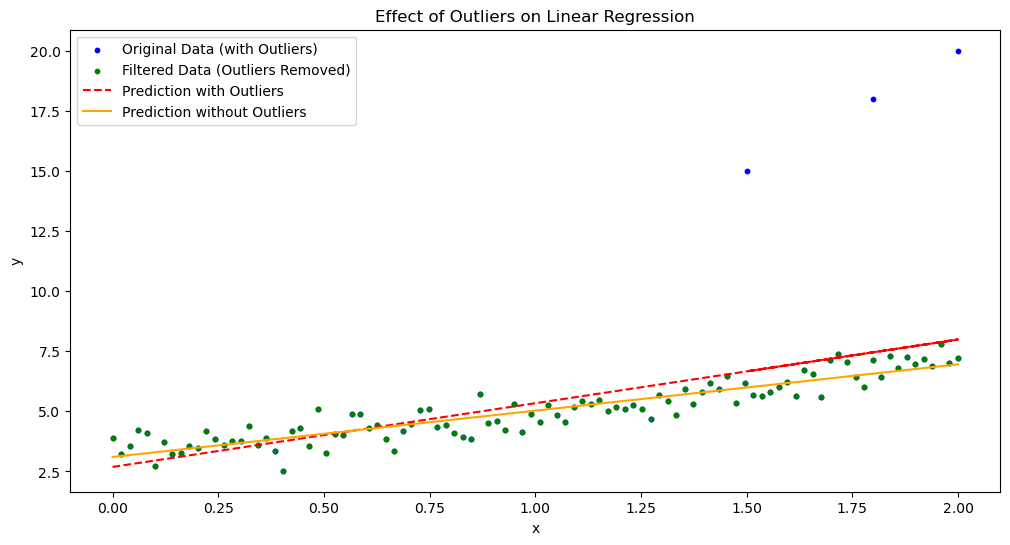

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

def linear_mle_normal_eq(x, y):
    X_b = np.c_[np.ones((x.shape[0], 1)), x]  
    theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
    return theta_best


np.random.seed(0)
x = np.linspace(0, 2, 100).reshape(-1, 1)
y = 3 + 2 * x + np.random.normal(0, 0.5, (100, 1))


x_outliers = np.array([[1.5], [1.8], [2.0]])
y_outliers = np.array([[15], [18], [20]])
x = np.vstack([x, x_outliers])
y = np.vstack([y, y_outliers])


def remove_outliers(x, y, threshold=3):
    data = np.hstack((x, y))
    z_scores = np.abs(zscore(data))
    non_outliers = (z_scores < threshold).all(axis=1)
    return x[non_outliers], y[non_outliers]


x_filtered, y_filtered = remove_outliers(x, y)

theta_with_outliers = linear_mle_normal_eq(x, y)
y_pred_with_outliers = np.c_[np.ones((x.shape[0], 1)), x] @ theta_with_outliers

theta_no_outliers = linear_mle_normal_eq(x_filtered, y_filtered)
y_pred_no_outliers = np.c_[np.ones((x_filtered.shape[0], 1)), x_filtered] @ theta_no_outliers


plt.figure(figsize=(12, 6))
plt.scatter(x, y, color='blue', label='Original Data (with Outliers)', s=10)
plt.scatter(x_filtered, y_filtered, color='green', label='Filtered Data (Outliers Removed)', s=10)
plt.plot(x, y_pred_with_outliers, color='red', linestyle='--', label='Prediction with Outliers')
plt.plot(x_filtered, y_pred_no_outliers, color='orange', label='Prediction without Outliers')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title("Effect of Outliers on Linear Regression")
plt.show()
